# Heart Disease Prediction: A Comparative Study of Optimizers Performance in Deep Neural Networks


In this study, we seek to evaluate different optimizers in training a deep neural network to predict heart diseases.

Our dataset was gotten from [kaggle](https://www.kaggle.com/datasets/mexwell/heart-disease-dataset). Find attached the data dictionary [here](https://github.com/chisomruth/HEART-DISEASE-PREDICTION-A-Comparative-Study-of-Optimizers-Performance-in-Deep-Neural-Network/blob/main/Heart%20disease/documentation.pdf)

In [1]:
#importing the necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import RobustScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers import AdamW
#from tensorflow_addons.optimizers import Yogi, NovoGrad
import time

import warnings 
warnings.filterwarnings("ignore")
print("libraries succesfully installed")

libraries succesfully installed


Now, let's read in our data

In [2]:
heart_disease = pd.read_csv(r"C:\Users\chiso\OneDrive\Documents\Predicting heart diseases\Heart disease\heart_statlog_cleveland_hungary_final.csv")
heart_disease_data = heart_disease.copy()
heart_disease_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Descriptive Analysis

In [3]:
#checking the shape of our dataframe
heart_disease_data.shape

(1190, 12)

Our dataset has 1,190 rows and 12 columns

In [4]:
#checking a summary of information in our dataset
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


All features in our dataset are of numeric datatype since some of the categories in these features have been encoded

In [7]:
#checking for summary statistics of our dataframe
heart_disease_data.describe(include = 'all')

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
#checking the different columns in our dataframe
heart_disease_data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

## Exploratory analysis

In [9]:
#making a list of the numeric columns in our dataframe
list_numeric_col= list(heart_disease_data.select_dtypes(include = ["int64", "float"]).columns)

In [12]:
#printing the numeric columns
list_numeric_col

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope',
 'target']

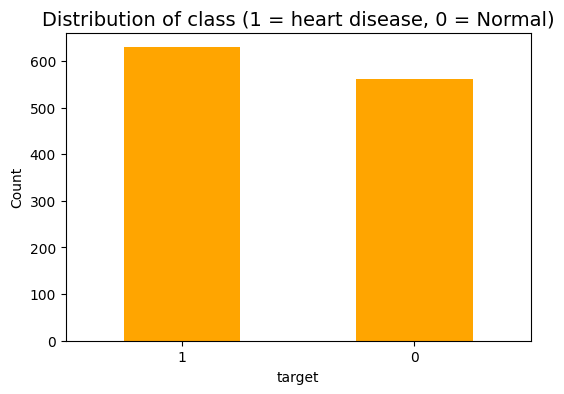

In [14]:
#plotting a distribution of our target variable
heart_disease_data["target"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="orange")
plt.title("Distribution of class (1 = heart disease, 0 = Normal)", fontsize=14)
plt.xlabel("target")
plt.ylabel("Count")
plt.show()

our data is quite balanced with respect to our target variable.
Hence, there is no need to handle Data imbalance

### Univariate analysis

In [16]:
#creating a list of our numeric features to be plotted as histogram
histplot_data = ['age','resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

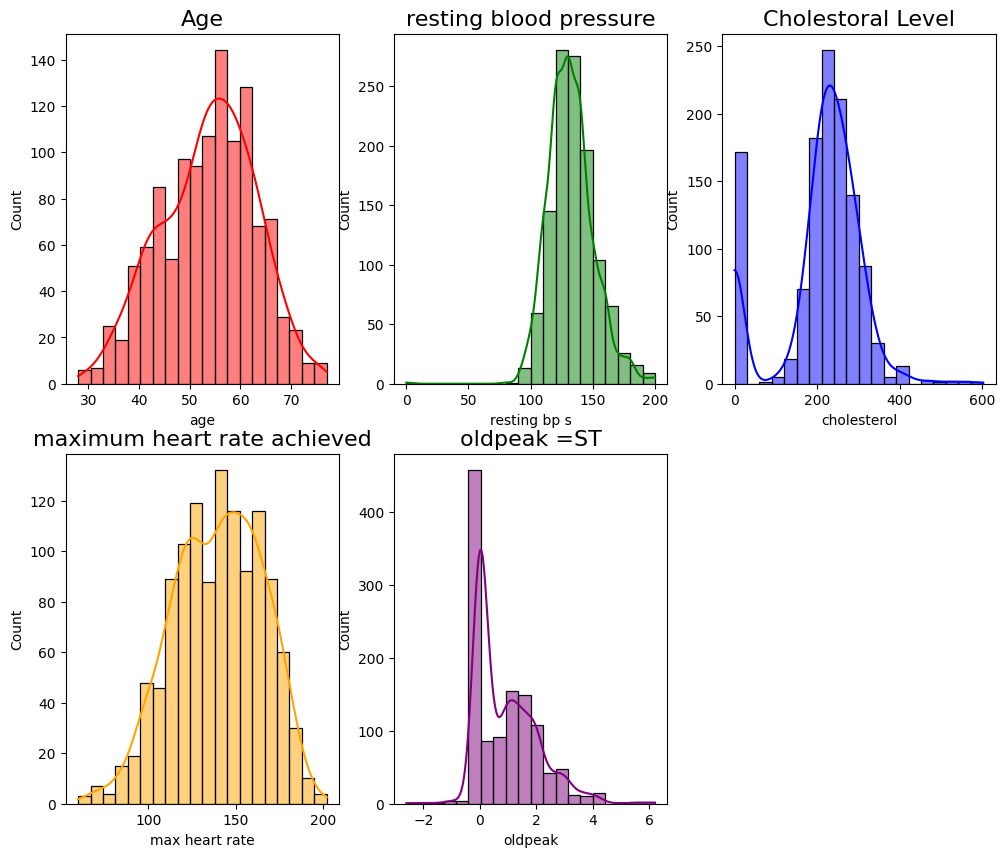

In [19]:
#plotting the distribution of the features in our histplot_data list
fig=plt.figure(figsize=(12,10))

ax=fig.add_subplot(231)
sns.histplot(heart_disease_data["age"], color="red", label="age", kde=True, bins=20, ax=ax)
ax.set_title('Age', fontsize=16)


ax=fig.add_subplot(232)
sns.histplot(heart_disease_data['resting bp s'], color="green", label='resting bp s', bins=20, kde=True, ax=ax)
ax.set_title('resting blood pressure', fontsize=16)

ax=fig.add_subplot(233)
sns.histplot(heart_disease_data['cholesterol'], color="blue", label='cholesterol',bins=20, kde=True, ax=ax)
ax.set_title('Cholestoral Level', fontsize=16)

ax=fig.add_subplot(234)
sns.histplot(heart_disease_data['max heart rate'], color="orange", label='max heart rate', kde=True, bins=20, ax=ax)
ax.set_title('maximum heart rate achieved', fontsize=16)


ax=fig.add_subplot(235)
sns.histplot(heart_disease_data['oldpeak'], color="purple", label='oldpeak', bins=20, kde=True, ax=ax)
ax.set_title('oldpeak =ST', fontsize=16)

plt.show()

our age and Max heart reate achieved features are almost normally distributed

In [23]:
#defining a function that counts the number of observations in each category for our categorical features
def val_count(data, histplot_data):
    value_counts = {}
    for col in data.columns:
        if col not in histplot_data:
            val_ct = data[col].value_counts()
            value_counts[col] = val_ct
    return value_counts

In [24]:
value_counts = val_count(heart_disease_data, histplot_data= histplot_data)

In [25]:
for col, counts in value_counts.items():
    print(f'Value counts for {col} column:\n{counts}\n')

Value counts for sex column:
sex
1    909
0    281
Name: count, dtype: int64

Value counts for chest pain type column:
chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64

Value counts for fasting blood sugar column:
fasting blood sugar
0    936
1    254
Name: count, dtype: int64

Value counts for resting ecg column:
resting ecg
0    684
2    325
1    181
Name: count, dtype: int64

Value counts for exercise angina column:
exercise angina
0    729
1    461
Name: count, dtype: int64

Value counts for ST slope column:
ST slope
2    582
1    526
3     81
0      1
Name: count, dtype: int64

Value counts for target column:
target
1    629
0    561
Name: count, dtype: int64



In [26]:
#printing our categorical features
for col in heart_disease_data.columns:
        if col not in histplot_data:
            print(col)

sex
chest pain type
fasting blood sugar
resting ecg
exercise angina
ST slope
target


we see that apart from our target variable, we have 6 categorical features

In [31]:
#defining a function that plots the distribution of our categorical variable
def count_plot(data):
    for col in data.columns:
        if col not in histplot_data:
            sns.countplot(data= data, x = col, color= 'darkred')
            plt.xlabel(col)
            plt.ylabel("Values")
            plt.title(f"Distribution of {col}")
            plt.show()

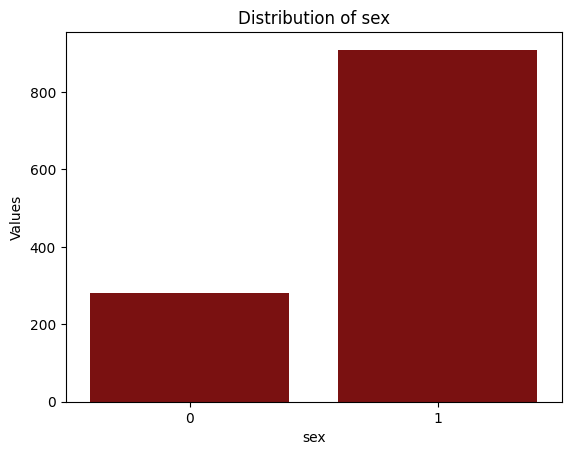

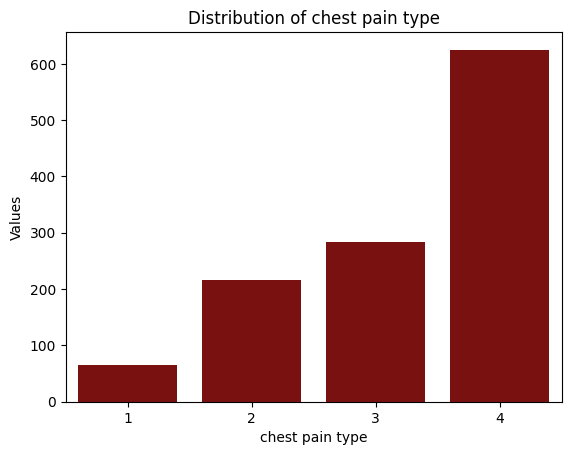

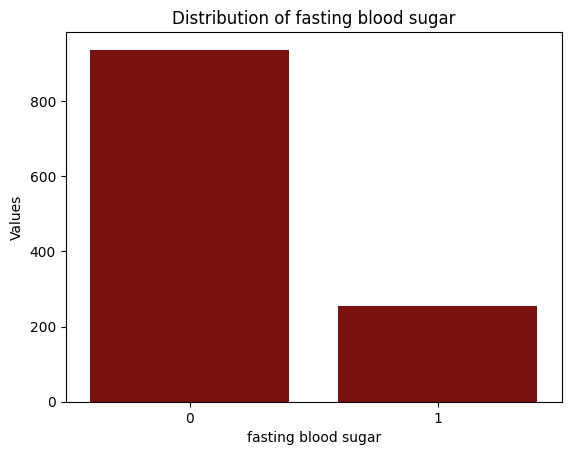

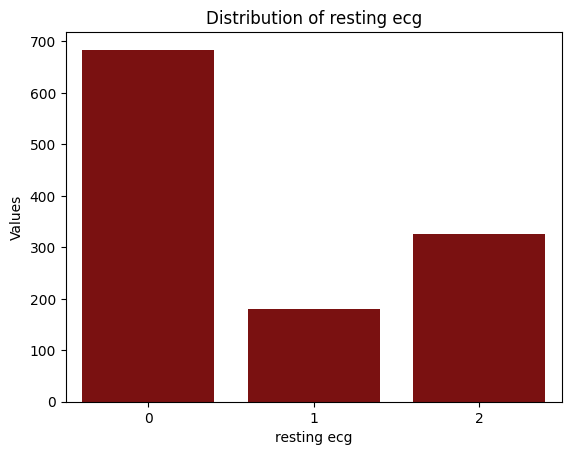

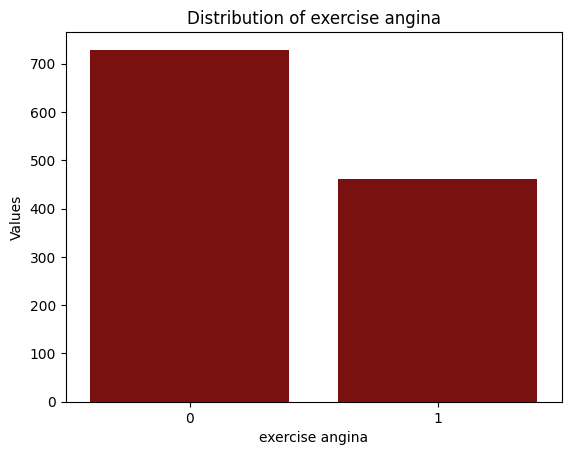

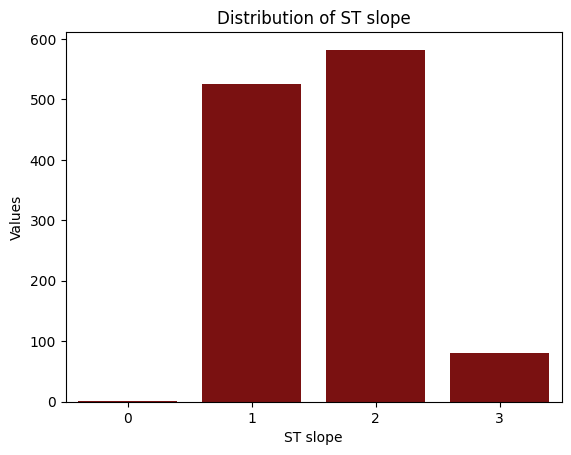

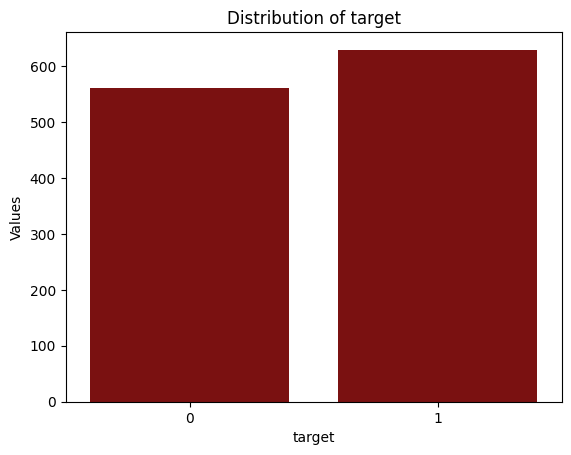

In [32]:
#plotting the distribution
count_plot(heart_disease_data)

- Majority of individuals with heart diseases are male(1)
- Most individuals have the asymptomatic chest pain type (4)
- Most individuals have fasting blood sugar that are not greater than 120 mg/dl(0)
- Most individuals have normal Resting electrocardiogram results (0)
- Most individuals  angina are not exercise induced (0)
- The slope of the peak exercise ST segment of most individuals are either 2: flat or 3: downsloping


### Bivariate analysis

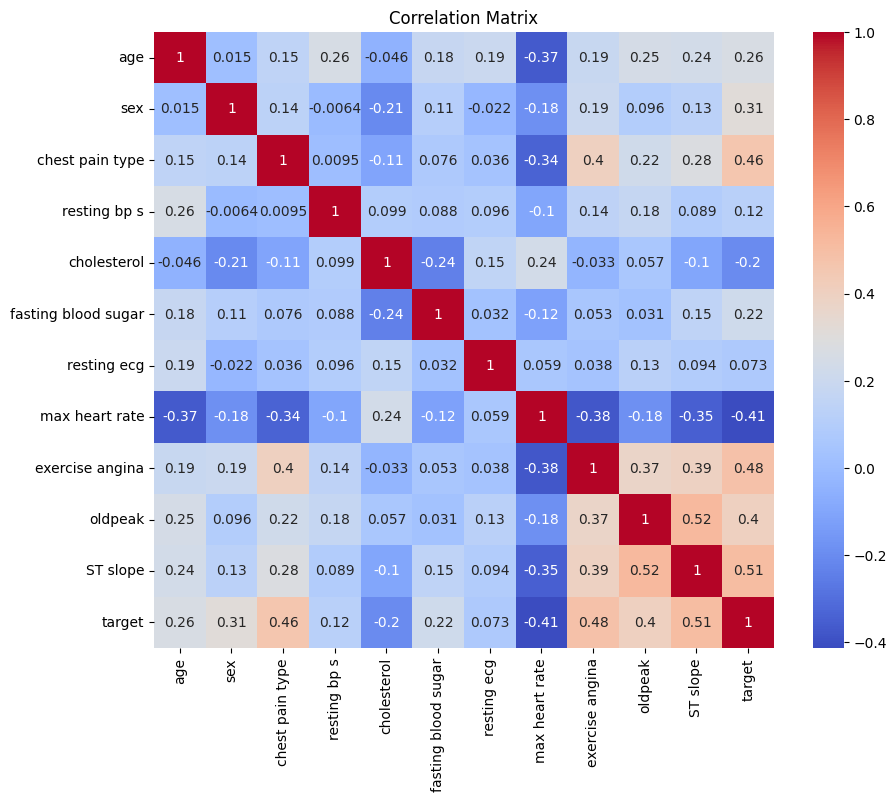

In [26]:
plt.figure(figsize = (10,8))
correlation_matrix = heart_disease_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
list_numeric_col

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope',
 'target']

In [28]:
['age','sex','chest pain type',]

['age', 'sex', 'chest pain type']

In [29]:
box_plot_data = ['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope']

In [30]:
def box_plot(data):
    for col in data.columns:
        if col in box_plot_data:
            sns.boxplot(data,  x= 'target', y= col)
            plt.xlabel(col)
            plt.ylabel('values')
            plt.title(f"Distribution of {col} by target")
            plt.legend()
            plt.show()

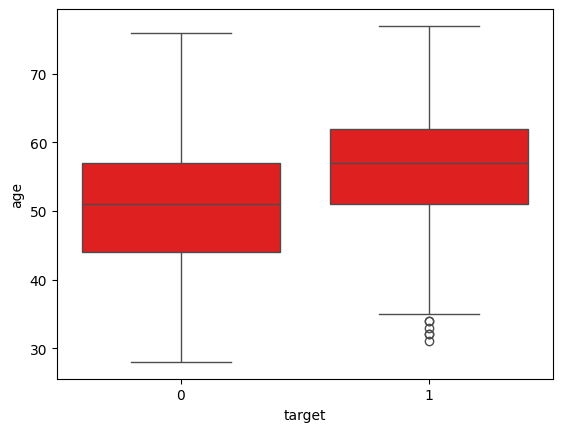

In [31]:
sns.boxplot(heart_disease_data, x="target", y="age", color = 'red')
plt.show()


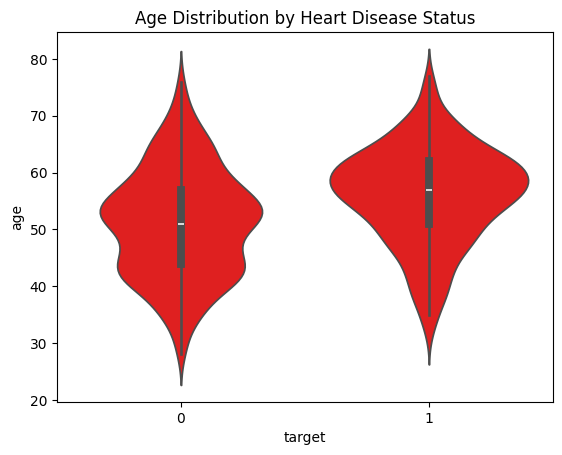

In [32]:
sns.violinplot(x='target', y='age', data=heart_disease_data, color ='red')
plt.title('Age Distribution by Heart Disease Status')
plt.show()

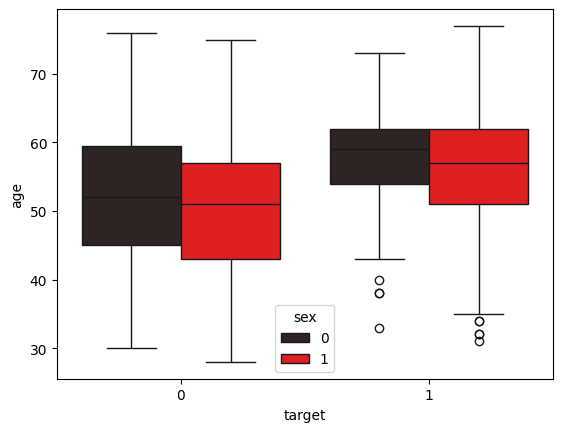

In [33]:
sns.boxplot(heart_disease_data,x="target", y="age",hue="sex", color = 'red')
plt.show()

   target  sex  count  total_count  percentage
0       0    0    211          561   37.611408
1       0    1    350          561   62.388592
2       1    0     70          629   11.128776
3       1    1    559          629   88.871224


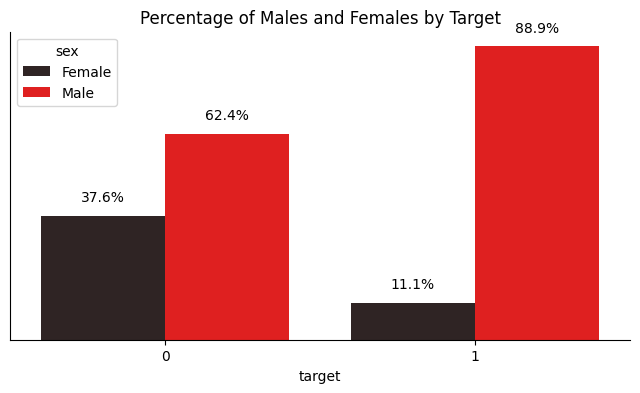

In [34]:
counts = heart_disease_data.groupby(['target', 'sex']).size().reset_index(name='count')
total_counts = counts.groupby('target')['count'].sum().reset_index(name='total_count')
percentages = counts.merge(total_counts, on='target')
percentages['percentage'] = 100 * percentages['count'] / percentages['total_count']

print(percentages)
percentages['sex'] = percentages['sex'].map({0: 'Female', 1: 'Male'})

# Create the plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=percentages, x='target', y='percentage', hue='sex', color = 'red')
ax.set_title('Percentage of Males and Females by Target')

ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Remove the black line surrounding the chart
sns.despine()

# Add percentage labels on the outside end of the bars
for p in ax.patches:
    height = p.get_height()  # get bar height
    if height > 0:  # Skip the annotation for bars with height 0
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', 
                    xytext=(0, 8), 
                    textcoords='offset points')

# Show the plot
plt.show()

In [35]:
heart_disease_data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

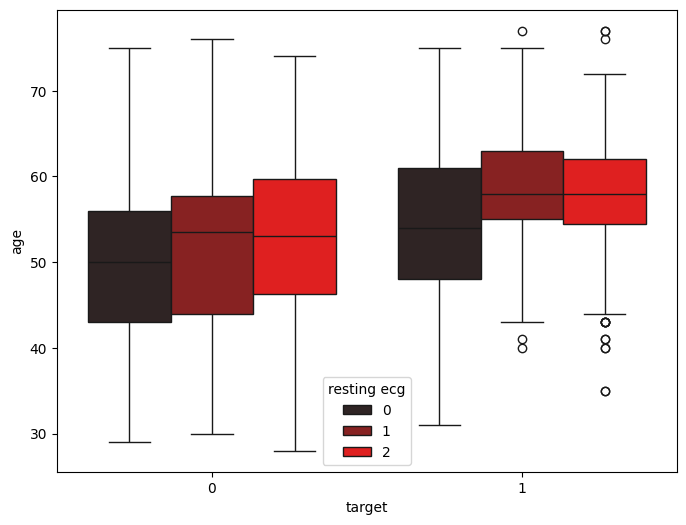

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(heart_disease_data,x="target", y="age",hue="resting ecg", color = 'red')
plt.show()

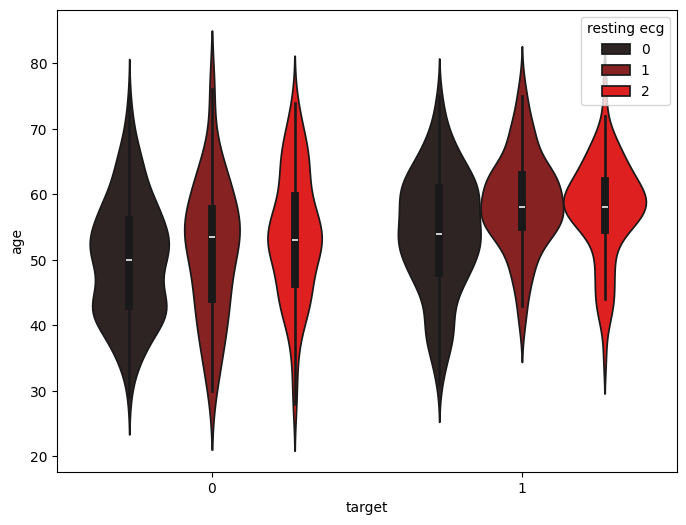

In [37]:
plt.figure(figsize=(8,6))
sns.violinplot(heart_disease_data,x="target", y="age",hue="resting ecg", color = 'red')
plt.show()

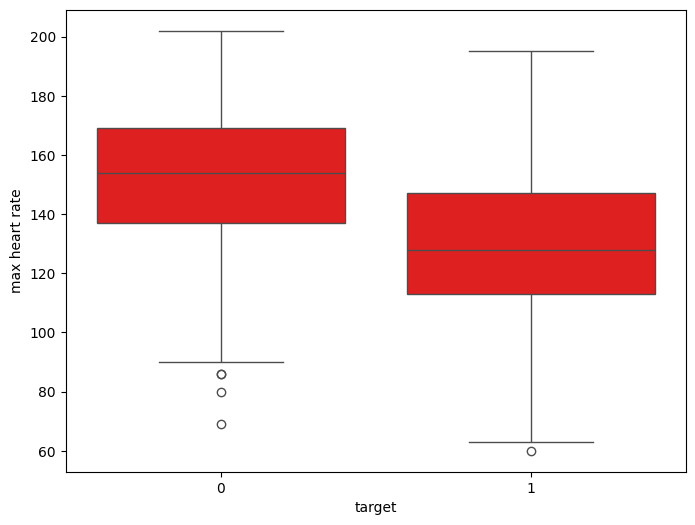

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(heart_disease_data,x="target", y='max heart rate', color = 'red')
plt.show()

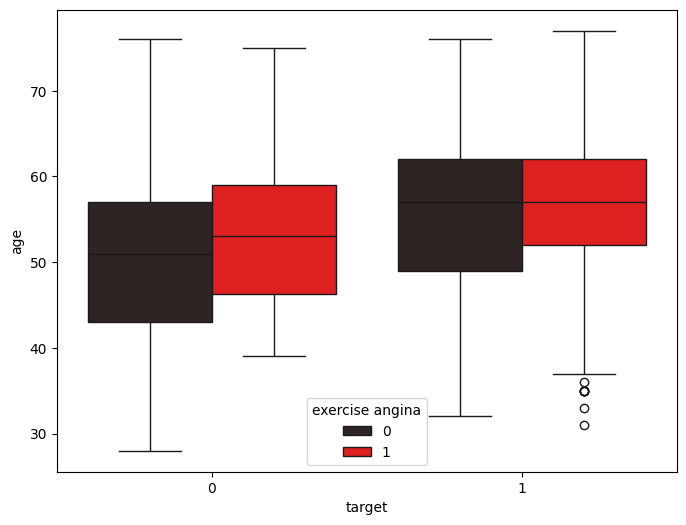

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(heart_disease_data,x="target", y='age', hue = 'exercise angina', color = 'red')
plt.show()

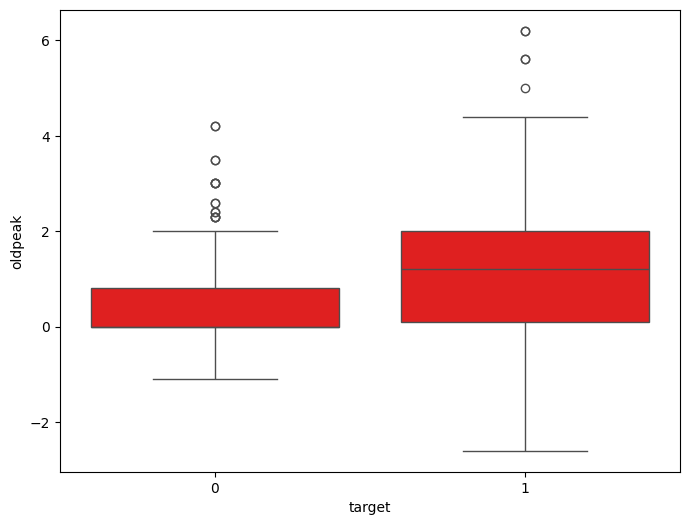

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(heart_disease_data,x="target", y='oldpeak', color = 'red')
plt.show()

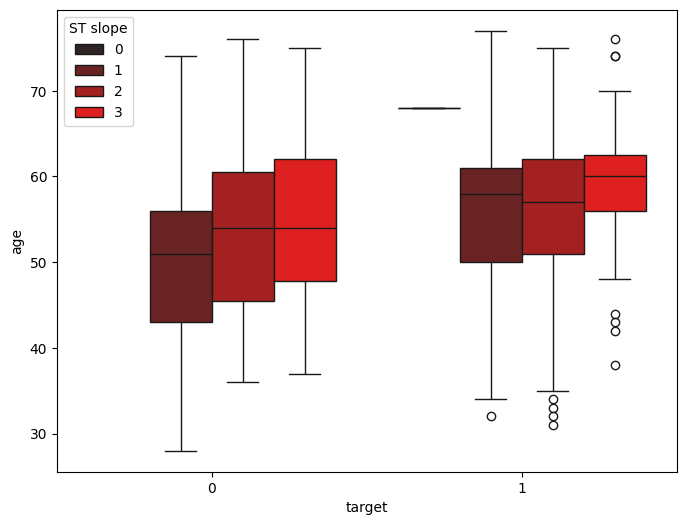

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(heart_disease_data,x="target", y='age', hue = 'ST slope', color = 'red')
plt.show()

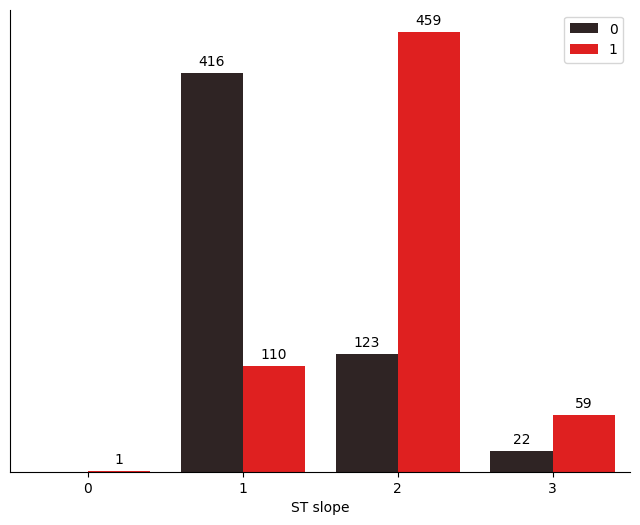

In [42]:
plt.figure(figsize=(8,6))
ax = sns.countplot(heart_disease_data,hue="target", x='ST slope', color = 'red')


ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Remove the black line surrounding the chart
sns.despine()

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Skip the annotation for bars with height 0
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, 8), 
                    textcoords='offset points')

# Show the plot
plt.legend()
plt.show()

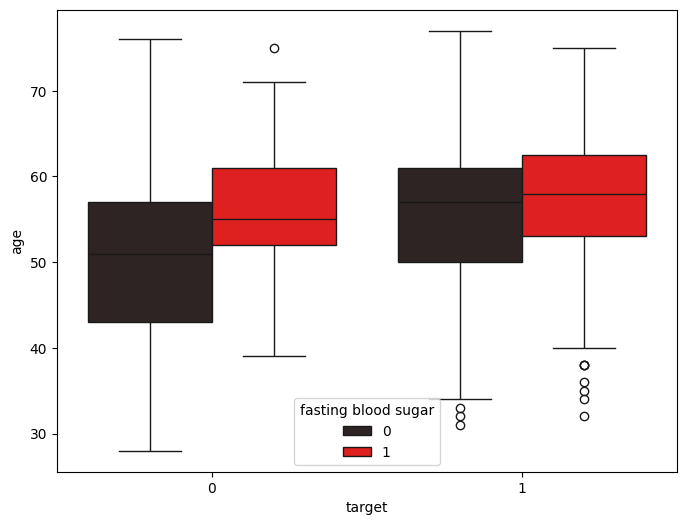

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(heart_disease_data,x="target", y="age",hue="fasting blood sugar", color = 'red')
plt.show()

   target  fasting blood sugar  count  total_count  percentage
0       0                    0    494          561   88.057041
1       0                    1     67          561   11.942959
2       1                    0    442          629   70.270270
3       1                    1    187          629   29.729730


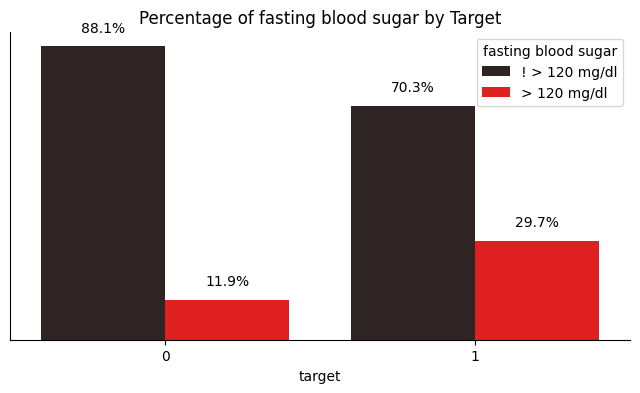

In [44]:
counts = heart_disease_data.groupby(['target', 'fasting blood sugar']).size().reset_index(name='count')
total_counts = counts.groupby('target')['count'].sum().reset_index(name='total_count')
percentages = counts.merge(total_counts, on='target')
percentages['percentage'] = 100 * percentages['count'] / percentages['total_count']

print(percentages)
percentages['fasting blood sugar'] = percentages['fasting blood sugar'].map({0: '! > 120 mg/dl', 1: '> 120 mg/dl'})

# Create the plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=percentages, x='target', y='percentage', hue='fasting blood sugar', color = 'red')
ax.set_title('Percentage of fasting blood sugar by Target')

ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Remove the black line surrounding the chart
sns.despine()


# Add percentage labels on the outside end of the bars
for p in ax.patches:
    height = p.get_height()  # get bar height
    if height > 0:  # Skip the annotation for bars with height 0
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', 
                    xytext=(0, 8), 
                    textcoords='offset points')

# Show the plot
plt.show()

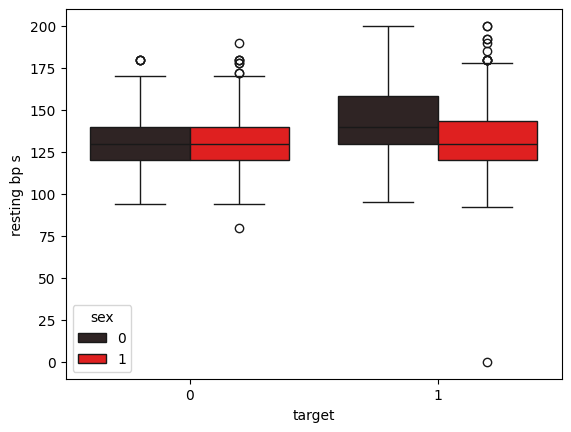

In [45]:
sns.boxplot(heart_disease_data,x="target", y="resting bp s",hue="sex", color = 'red')
plt.show()


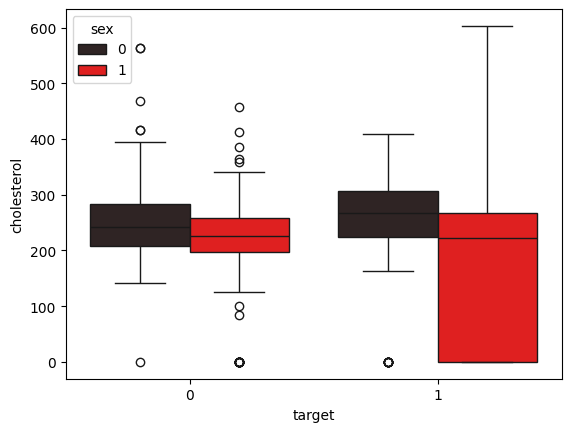

In [46]:
sns.boxplot(heart_disease_data,x="target", y="cholesterol",hue="sex", color = 'red')
plt.show()

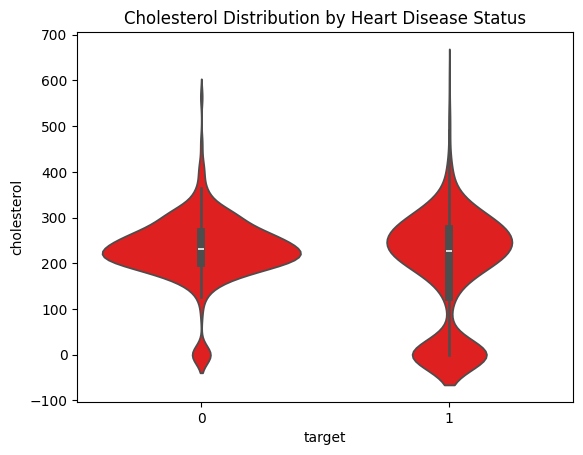

In [47]:
sns.violinplot(x='target', y='cholesterol', data=heart_disease_data, color ='red')
plt.title('Cholesterol Distribution by Heart Disease Status')
plt.show()

In [48]:
for col in heart_disease_data.columns:
        if col not in histplot_data:
            print(col)

sex
chest pain type
fasting blood sugar
resting ecg
exercise angina
ST slope
target


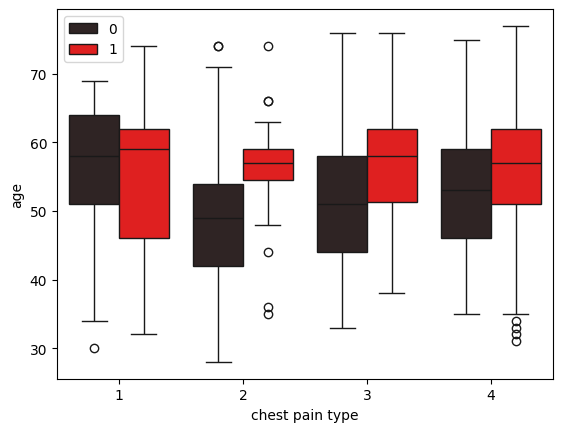

In [49]:
#sns.countplot(heart_disease_data, x="chest pain type", hue="target")
sns.boxplot(heart_disease_data, hue="target", x="chest pain type", y="age", color = 'red')
plt.legend()
plt.show()

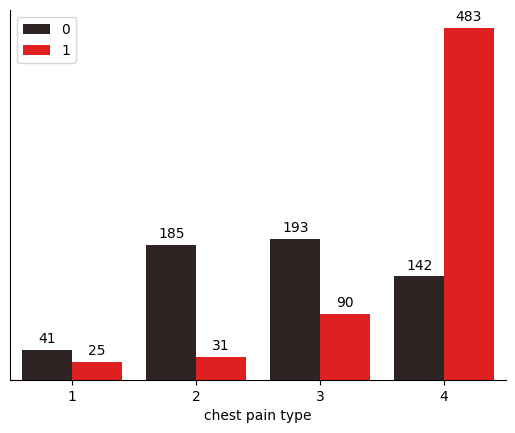

In [50]:

ax = sns.countplot(heart_disease_data, hue="target", x="chest pain type",  color = 'red')

ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Remove the black line surrounding the chart
sns.despine()

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Skip the annotation for bars with height 0
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, 8), 
                    textcoords='offset points')

# Show the plot
plt.legend()
plt.show()

In [51]:
heart_disease_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [52]:
heart_disease_data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

### MULTIVARIATE ANALYSIS

### Data Preprocessing

In [53]:
heart_disease_data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [54]:
heart_disease_data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [55]:
heart_disease_data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [34]:
print(heart_disease_data.duplicated().sum())
heart_disease_data[heart_disease_data.duplicated()]

272


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


In [56]:
heart_disease_data.nunique()

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

In [ ]:
def unique_val(data):
    for col in data.columns:
        unique_values = data[col].unique()
        num_unique_values = len(unique_values)
        if 1 < num_unique_values < 5:
            print(f'Here are the unique values in {col} column: {unique_values}')

In [57]:
unique_val(heart_disease_data)

Here are the unique values in sex column: [1 0]
Here are the unique values in chest pain type column: [2 3 4 1]
Here are the unique values in fasting blood sugar column: [0 1]
Here are the unique values in resting ecg column: [0 1 2]
Here are the unique values in exercise angina column: [0 1]
Here are the unique values in ST slope column: [1 2 3 0]
Here are the unique values in target column: [0 1]


In [58]:
heart_disease_data.describe(include = 'all')

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [59]:
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

In [60]:
X= heart_disease_data.drop(columns= 'target', axis=1).values
y = heart_disease_data['target'].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [62]:
robust_scaler= RobustScaler()
x_train=robust_scaler.fit_transform(X_train)
x_test=robust_scaler.transform(X_test)

In [63]:
x_test.shape

(357, 11)

In [64]:
x_train.shape

(833, 11)

In [65]:

class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)


In [79]:
# Define the model architecture
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(24, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define optimizers to evaluate
optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad(),
    'Adadelta': Adadelta(),
    'Adamax': Adamax(),
    'Nadam': Nadam(),
    'Ftrl': Ftrl(),
    #'NesterovAdam': Adam(nesterov=True),
    'AMSgrad': Adam(amsgrad=True),
    'AdamW': Adam(amsgrad=False),
    'sgd_momentum': SGD(momentum=0.9),
    'sgd_nesterov': SGD(nesterov=True),
    # 'yogi': Yogi(),
    #'novograd': NovoGrad(),
    # 'l-bfgs':tf.keras.optimizers.experimental.LBFGS(),
    #'tfoptimizer': tf.keras.optimizers.experimental.TFOptimizer(SGD())
}



results = {}
training_times = {}
for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name}")
    model = create_model(optimizer=opt)
    time_callback = TimeHistory()
    history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), time_callback])
    
    results[opt_name] = history
    training_times[opt_name] = time_callback.times


Training with SGD
Training with Adam
Training with RMSprop
Training with Adagrad
Training with Adadelta
Training with Adamax
Training with Nadam
Training with Ftrl
Training with AMSgrad
Training with AdamW
Training with sgd_momentum
Training with sgd_nesterov


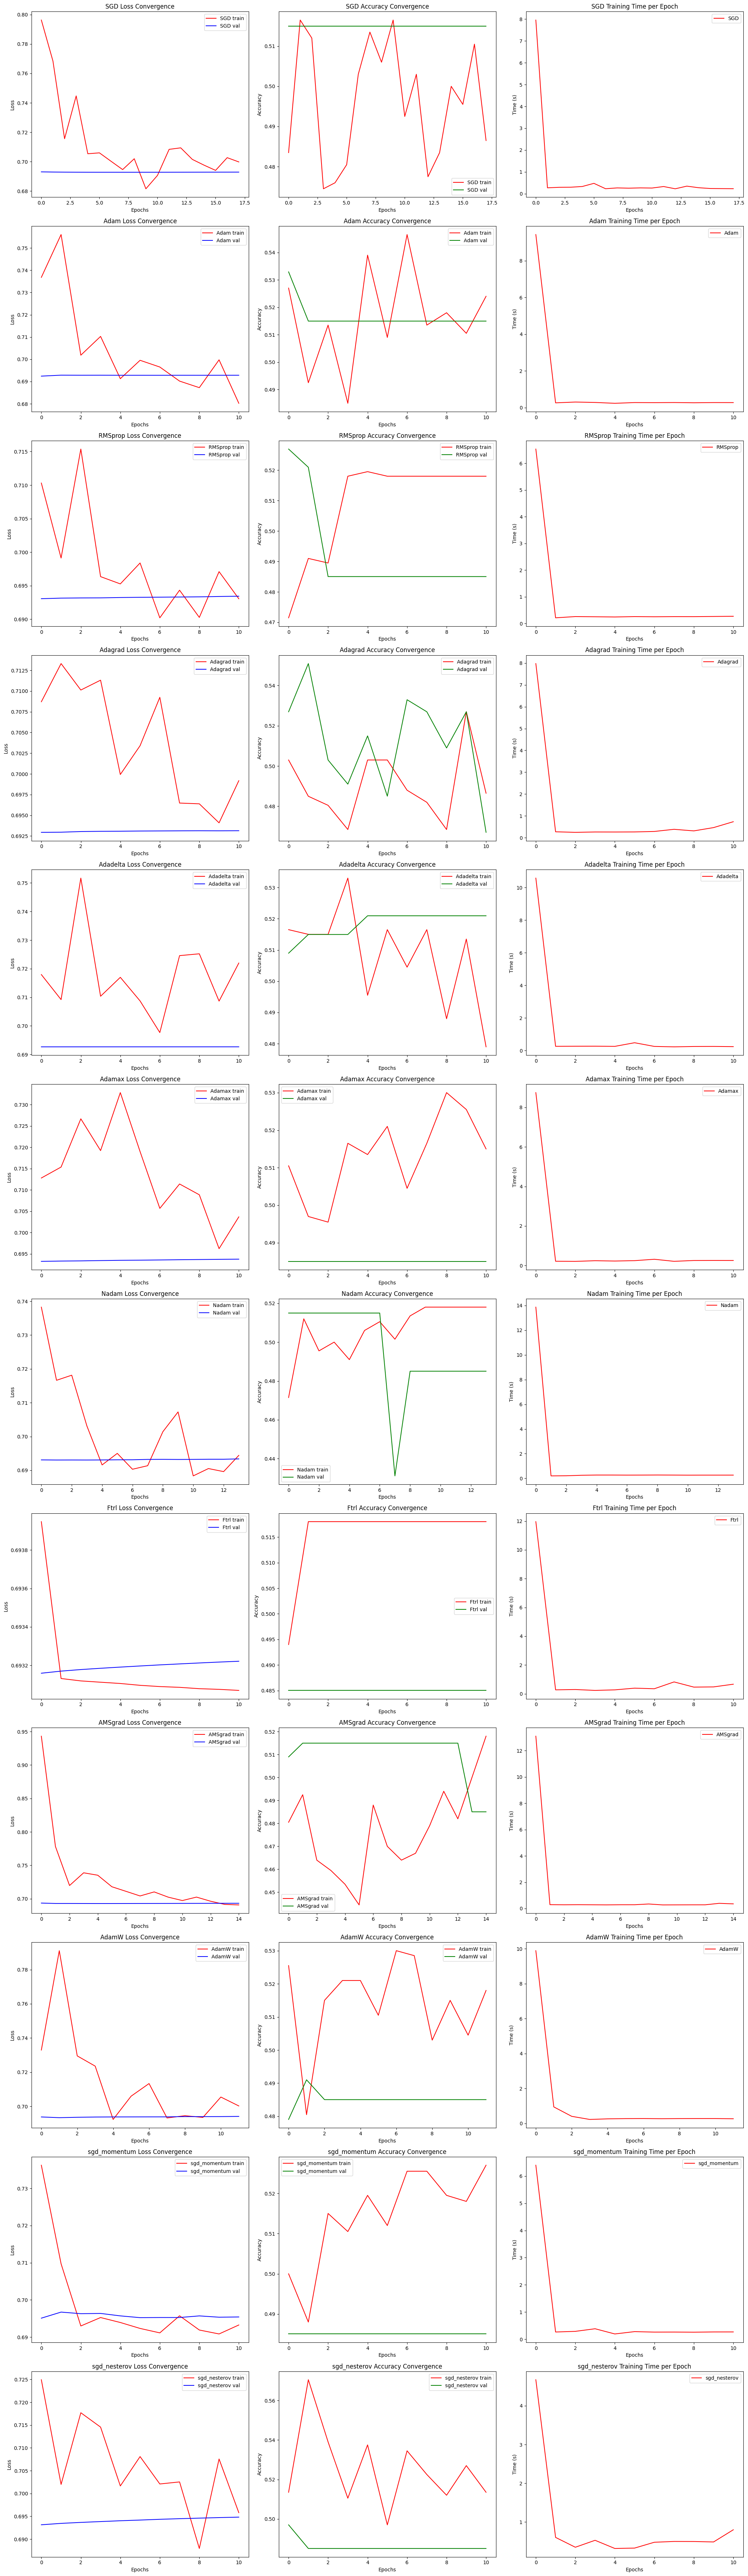

In [78]:
# Plotting the results
num_optimizers = len(optimizers)
fig, axes = plt.subplots(num_optimizers, 3, figsize=(21, 6 * num_optimizers))

for i, (opt_name, history) in enumerate(results.items()):
    # Loss Convergence
    axes[i, 0].plot(history.history['loss'], label=f'{opt_name} train', color='red')
    axes[i, 0].plot(history.history['val_loss'], label=f'{opt_name} val', color='blue')
    axes[i, 0].set_title(f'{opt_name} Loss Convergence')
    axes[i, 0].set_xlabel('Epochs')
    axes[i, 0].set_ylabel('Loss')
    axes[i, 0].legend()

    # Accuracy Convergence
    axes[i, 1].plot(history.history['accuracy'], label=f'{opt_name} train', color='red')
    axes[i, 1].plot(history.history['val_accuracy'], label=f'{opt_name} val',  color='green')
    axes[i, 1].set_title(f'{opt_name} Accuracy Convergence')
    axes[i, 1].set_xlabel('Epochs')
    axes[i, 1].set_ylabel('Accuracy')
    axes[i, 1].legend()

    # Training Time per Epoch
    axes[i, 2].plot(training_times[opt_name], label=f'{opt_name}', color='red')
    axes[i, 2].set_title(f'{opt_name} Training Time per Epoch')
    axes[i, 2].set_xlabel('Epochs')
    axes[i, 2].set_ylabel('Time (s)')
    axes[i, 2].legend()

plt.tight_layout()
plt.show()
